In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#libraries to help visualize data
import matplotlib.pyplot as plt

#libraries to shuffle image data
import os #used to change directories and make directories
import shutil #used to move image samples from directories
import random #used to shuffle samples

#import another python file we created

In [23]:
class_names = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]

In [79]:
train_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/train"
test_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/test"

train_batch = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type1, target_size=(64, 64), classes=class_names, batch_size=50, shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_type1, target_size=(64, 64), classes=class_names, batch_size=10, shuffle=False)

Found 5332 images belonging to 18 classes.
Found 1475 images belonging to 18 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

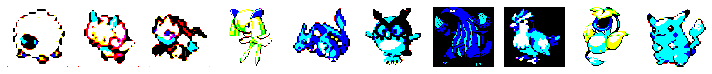

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [88]:
#visualize data (function is from tensorflow's website)
imgs, labels = next(train_batch)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)


In [26]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.25),
    Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.25),
    Flatten(),
    Dense(units = 18, activation = 'softmax'),
])
#definitely need to extend, feels like data is being overfitted?

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)      

In [80]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [81]:
model.fit(x=train_batch, steps_per_epoch = 50, epochs=25, verbose=1)

Epoch 1/25
50/50 [==============================] - 20s 401ms/step - loss: 1.4739 - accuracy: 0.5314 - mean_squared_error: 0.0336
Epoch 2/25
50/50 [==============================] - 20s 403ms/step - loss: 1.3707 - accuracy: 0.5643 - mean_squared_error: 0.0316
Epoch 3/25
50/50 [==============================] - 20s 403ms/step - loss: 1.3363 - accuracy: 0.5752 - mean_squared_error: 0.0311
Epoch 4/25
50/50 [==============================] - 20s 405ms/step - loss: 1.2521 - accuracy: 0.5986 - mean_squared_error: 0.0294
Epoch 5/25
50/50 [==============================] - 20s 403ms/step - loss: 1.2190 - accuracy: 0.6262 - mean_squared_error: 0.0284
Epoch 6/25
50/50 [==============================] - 20s 402ms/step - loss: 1.1445 - accuracy: 0.6293 - mean_squared_error: 0.0272
Epoch 7/25
50/50 [==============================] - 20s 405ms/step - loss: 1.0731 - accuracy: 0.6661 - mean_squared_error: 0.0256
Epoch 8/25
50/50 [==============================] - 20s 401ms/step - loss: 1.0318 - accura

In [82]:
output = model.predict(test_batch)
output

array([[3.59208696e-02, 8.28358168e-07, 3.55322380e-03, ...,
        7.32732285e-03, 9.34490515e-07, 2.79497472e-03],
       [3.00351530e-01, 1.91173924e-03, 4.71162349e-02, ...,
        3.72188538e-01, 1.84865148e-05, 1.52883660e-02],
       [9.00478438e-02, 1.36859497e-04, 1.85303134e-03, ...,
        9.28644538e-02, 2.58858055e-01, 2.83834517e-01],
       ...,
       [3.05566950e-08, 4.93432184e-10, 6.81142410e-06, ...,
        3.33362515e-03, 2.80393870e-04, 9.91183639e-01],
       [3.29486839e-02, 9.75498650e-03, 5.38429096e-02, ...,
        1.35192629e-02, 1.17611671e-04, 5.14377117e-01],
       [4.13336738e-06, 1.13615185e-11, 4.24713198e-09, ...,
        1.43114244e-06, 5.14058369e-22, 6.47846318e-05]], dtype=float32)

In [121]:
prediction = []

def getType(pokemon):
    return np.argmax(pokemon)

for x in range(0,len(output)):
    prediction.append(getType(output[x]))

def test_accuracy(prediction, real):
    correct = 0
    if len(prediction) != len(real):
        print("Error")
        return 0
    for x in range(0, len(prediction)):
        if prediction[x] == real[x]:
            correct += 1
    print(100 * (correct / len(prediction)))

test_accuracy(prediction,test_batch.labels)

61.5593220338983


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

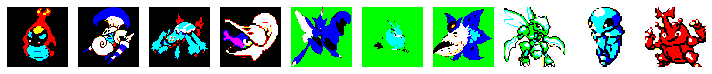

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [86]:
imgs, labels = next(test_batch)
plotImages(imgs)
print(labels)

In [95]:
test_batch.filenames

['Bug\\black-white-123.png',
 'Bug\\black-white-193.png',
 'Bug\\black-white-204.png',
 'Bug\\black-white-214.png',
 'Bug\\black-white-269.png',
 'Bug\\black-white-292.png',
 'Bug\\black-white-412-sandy.png',
 'Bug\\black-white-413.png',
 'Bug\\black-white-46.png',
 'Bug\\black-white-558.png',
 'Bug\\black-white-588.png',
 'Bug\\black-white-589.png',
 'Bug\\black-white-596.png',
 'Bug\\black-white-616.png',
 'Bug\\conquest-212.png',
 'Bug\\conquest-541.png',
 'Bug\\conquest-637.png',
 'Bug\\crystal-123.png',
 'Bug\\crystal-14.png',
 'Bug\\crystal-214.png',
 'Bug\\crystal-46.png',
 'Bug\\crystal-48.png',
 'Bug\\diamond-pearl-11.png',
 'Bug\\diamond-pearl-127.png',
 'Bug\\diamond-pearl-13.png',
 'Bug\\diamond-pearl-14.png',
 'Bug\\diamond-pearl-291.png',
 'Bug\\diamond-pearl-292.png',
 'Bug\\diamond-pearl-413-sandy.png',
 'Bug\\diamond-pearl-413-trash.png',
 'Bug\\diamond-pearl-414.png',
 'Bug\\diamond-pearl-46.png',
 'Bug\\emerald-166.png',
 'Bug\\emerald-193.png',
 'Bug\\emerald-204.pn